# 🍫 ChocoCrunch Analytics : Sweet Insights, Bitter Truths

### Phase 1: Data Extraction

In [1]:
import requests
import pandas as pd
import time

# API base URL
BASE_URL = "https://world.openfoodfacts.org/api/v2/search"

# Parameters
params = {
    "categories": "chocolates",
    "fields": "code,product_name,brands,nutriments",
    "page_size": 100,
}

all_products = []
MAX_PAGES = 120  # ~12,000 products (100 per page)

#### Step 2 — Fetch Paginated Data

In [2]:
for page in range(1, MAX_PAGES + 1):
    params["page"] = page
    retries = 3
    for attempt in range(1, retries + 1):
        try:
            response = requests.get(BASE_URL, params=params, timeout=30)  # increased timeout
            response.raise_for_status()
            data = response.json()
            products = data.get("products", [])
            all_products.extend(products)
            print(f"✅ Page {page} fetched successfully with {len(products)} records.")
            break  # success → exit retry loop
        except requests.exceptions.RequestException as e:
            print(f"⚠️ Page {page} attempt {attempt} failed: {e}")
            if attempt < retries:
                print("⏳ Retrying in 5 seconds...")
                time.sleep(5)
            else:
                print(f"❌ Skipping page {page} after {retries} failed attempts.")
    time.sleep(1)  # polite pause to avoid rate limits

print(f"✅ Total products fetched: {len(all_products)}")


✅ Page 1 fetched successfully with 100 records.
✅ Page 2 fetched successfully with 100 records.
✅ Page 3 fetched successfully with 100 records.
✅ Page 4 fetched successfully with 100 records.
✅ Page 5 fetched successfully with 100 records.
✅ Page 6 fetched successfully with 100 records.
✅ Page 7 fetched successfully with 100 records.
✅ Page 8 fetched successfully with 100 records.
✅ Page 9 fetched successfully with 100 records.
✅ Page 10 fetched successfully with 100 records.
✅ Page 11 fetched successfully with 100 records.
✅ Page 12 fetched successfully with 100 records.
✅ Page 13 fetched successfully with 100 records.
✅ Page 14 fetched successfully with 100 records.
✅ Page 15 fetched successfully with 99 records.
✅ Page 16 fetched successfully with 100 records.
✅ Page 17 fetched successfully with 100 records.
✅ Page 18 fetched successfully with 100 records.
✅ Page 19 fetched successfully with 100 records.
✅ Page 20 fetched successfully with 100 records.
✅ Page 21 fetched successfully

#### Step 3 — Convert to Dataframe

In [3]:
# Flatten relevant data
rows = []
for product in all_products:
    nutriments = product.get("nutriments", {})
    rows.append({
        "product_code": product.get("code"),
        "product_name": product.get("product_name"),
        "brand": product.get("brands"),
        "energy_kcal": nutriments.get("energy-kcal_100g"),
        "energy_kj": nutriments.get("energy-kj_100g"),
        "carbohydrates": nutriments.get("carbohydrates_100g"),
        "sugars": nutriments.get("sugars_100g"),
        "fat": nutriments.get("fat_100g"),
        "saturated_fat": nutriments.get("saturated-fat_100g"),
        "proteins": nutriments.get("proteins_100g"),
        "fiber": nutriments.get("fiber_100g"),
        "salt": nutriments.get("salt_100g"),
        "sodium": nutriments.get("sodium_100g"),
        "nova_group": nutriments.get("nova-group"),
        "nutrition_score_fr": nutriments.get("nutrition-score-fr"),
        "fruits_veg_nuts_pct": nutriments.get("fruits-vegetables-nuts-estimate-from-ingredients_100g"),
    })

df = pd.DataFrame(rows)
df.head()

,product_code,product_name,brand,energy_kcal,energy_kj,carbohydrates,sugars,fat,saturated_fat,proteins,fiber,salt,sodium,nova_group,nutrition_score_fr,fruits_veg_nuts_pct
0,6111035000430,Sidi Ali,Sidi Ali,0.0,2.0,4.2,1.4,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,1.0,0.0
1,6111242100992,perly,perly,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,0.0
2,6111035002175,Sidi Ali,sidi ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065000,0.026000,1.0,0.0,0.0
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065000,0.026000,1.0,0.0,0.0
4,6111252421568,اكوافينا,AQUAFINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.000203,NaN,0.0,0.0


#### Step 4 — Save the extracted data

In [8]:
save_path_csv = r"C:/Users/ayesh/Downloads/mini_project2/choco_raw.csv"
df.to_csv(save_path_csv, index=False)

print(f"✅ Saved {len(df)} records to CSV → {save_path_csv}")


✅ Saved 11997 records to CSV → C:/Users/ayesh/Downloads/mini_project2/choco_raw.csv


In [9]:
import os

# File path
save_path_csv = r"C:/Users/ayesh/Downloads/mini_project2/choco_raw.csv"

# ✅ If file already exists, skip fetching
if os.path.exists(save_path_csv):
    print(f"📂 File already exists → {save_path_csv}")
    df = pd.read_csv(save_path_csv)
    print(f"✅ Loaded {len(df)} records from CSV.")
else:
    print("CSV not found → Fetching data from API...")

    BASE_URL = "https://world.openfoodfacts.org/api/v2/search"
    params = {
        "categories": "chocolates",
        "fields": "code,product_name,brands,nutriments",
        "page_size": 100,
    }

    all_products = []
    MAX_PAGES = 120  # ~12,000 products (100 per page)
    for page in range(1, MAX_PAGES + 1):
        params["page"] = page
        retries = 3
        for attempt in range(1, retries + 1):
            try:
                response = requests.get(BASE_URL, params=params, timeout=30)
                response.raise_for_status()
                data = response.json()
                products = data.get("products", [])
                all_products.extend(products)
                print(f"Page {page} fetched successfully with {len(products)} records.")
                break
            except requests.exceptions.RequestException as e:
                print(f"Page {page} attempt {attempt} failed: {e}")
                if attempt < retries:
                    print("Retrying in 5 seconds...")
                    time.sleep(5)
                else:
                    print(f"Skipping page {page} after {retries} failed attempts.")
        time.sleep(1)

    print(f"Total products fetched: {len(all_products)}")
    # Flatten relevant data
    rows = []
    for product in all_products:
        nutriments = product.get("nutriments", {})
        rows.append({
            "product_code": product.get("code"),
            "product_name": product.get("product_name"),
            "brand": product.get("brands"),
            "energy_kcal": nutriments.get("energy-kcal_100g"),
            "energy_kj": nutriments.get("energy-kj_100g"),
            "carbohydrates": nutriments.get("carbohydrates_100g"),
            "sugars": nutriments.get("sugars_100g"),
            "fat": nutriments.get("fat_100g"),
            "saturated_fat": nutriments.get("saturated-fat_100g"),
            "proteins": nutriments.get("proteins_100g"),
            "fiber": nutriments.get("fiber_100g"),
            "salt": nutriments.get("salt_100g"),
            "sodium": nutriments.get("sodium_100g"),
            "nova_group": nutriments.get("nova-group"),
            "nutrition_score_fr": nutriments.get("nutrition-score-fr"),
            "fruits_veg_nuts_pct": nutriments.get("fruits-vegetables-nuts-estimate-from-ingredients_100g"),
        })

    df = pd.DataFrame(rows)
    df.to_csv(save_path_csv, index=False)
    print(f"✅ Saved {len(df)} records to CSV → {save_path_csv}")


📂 File already exists → C:/Users/ayesh/Downloads/mini_project2/choco_raw.csv
✅ Loaded 11997 records from CSV.


In [10]:
df = pd.read_csv("choco_raw.csv")
df.head()

,product_code,product_name,brand,energy_kcal,energy_kj,carbohydrates,sugars,fat,saturated_fat,proteins,fiber,salt,sodium,nova_group,nutrition_score_fr,fruits_veg_nuts_pct
0,6111035000430,Sidi Ali,Sidi Ali,0.0,2.0,4.2,1.4,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,1.0,0.0
1,6111242100992,perly,perly,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,0.0
2,6111035002175,Sidi Ali,sidi ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065000,0.026000,1.0,0.0,0.0
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065000,0.026000,1.0,0.0,0.0
4,6111252421568,اكوافينا,AQUAFINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000508,0.000203,NaN,0.0,0.0


## PHASE 2 : Data Cleaning
🎯 Objective

Handle missing/null values

Drop unnecessary columns

Standardize column names

Impute missing numeric/categorical data

Remove duplicates

Save cleaned CSV → ```choco_cleaned.csv```

#### Step 1 — Load raw CSV

In [11]:
import pandas as pd

# Load raw CSV from Phase 1
raw_csv_path = r"C:/Users/ayesh/Downloads/mini_project2/choco_raw.csv"
df = pd.read_csv(raw_csv_path)

# Quick overview

print(df.head())
print(df.info())

    product_code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   

                                  brand  energy_kcal  energy_kj  \
0                              Sidi Ali          0.0        2.0   
1                                 perly         97.0      406.0   
2                              sidi ali          NaN        NaN   
3  Les Eaux Minérales d'oulmès,Sidi Ali          NaN        NaN   
4                              AQUAFINA          0.0        0.0   

   carbohydrates  sugars  fat  saturated_fat  proteins  fiber      salt  \
0            4.2     1.4  0.0            0.0       0.0    0.0  0.000000   
1            9.4     NaN  3.0            NaN       8.0    NaN       NaN   
2            NaN     NaN  NaN            NaN       NaN    NaN  0.065000   
3            NaN     NaN  NaN   

#### Step 2 — Standardize column names

In [12]:
# Convert all column names to snake_case
df.columns = [col.lower().replace("-", "_") for col in df.columns]

#### Step 3 — Handle missing values

##### 3a. Drop columns with >70% missing

In [13]:
threshold = 0.7
df = df[df.columns[df.isnull().mean() < threshold]]

##### 3b. Fill numeric columns with median

In [14]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\ayesh\AppData\Local\Temp\ipykernel_13884\1480994193.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ayesh\AppData\Local\Temp\ipykernel_13884\1480994193.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

##### 3c. Fill categorical columns with "Unknown"

In [15]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna("Unknown", inplace=True)

C:\Users\ayesh\AppData\Local\Temp\ipykernel_13884\921512858.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


#### Step 4 — Remove duplicates

In [16]:
df.drop_duplicates(subset="product_code", inplace=True)

#### Step 5 — Sanity checks

In [17]:
print(df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11997 entries, 0 to 11996
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_code         11997 non-null  int64  
 1   product_name         11997 non-null  object 
 2   brand                11997 non-null  object 
 3   energy_kcal          11997 non-null  float64
 4   energy_kj            11997 non-null  float64
 5   carbohydrates        11997 non-null  float64
 6   sugars               11997 non-null  float64
 7   fat                  11997 non-null  float64
 8   saturated_fat        11997 non-null  float64
 9   proteins             11997 non-null  float64
 10  fiber                11997 non-null  float64
 11  salt                 11997 non-null  float64
 12  sodium               11997 non-null  float64
 13  nova_group           11997 non-null  float64
 14  nutrition_score_fr   11997 non-null  float64
 15  fruits_veg_nuts_pct  11997 non-null 

#### Step 6 — Save cleaned CSV

In [18]:
cleaned_csv_path = r"C:/Users/ayesh/Downloads/mini_project2/choco_cleaned.csv"
df.to_csv(cleaned_csv_path, index=False)

print(f"✅ Cleaned data saved → {cleaned_csv_path} with {len(df)} records")

✅ Cleaned data saved → C:/Users/ayesh/Downloads/mini_project2/choco_cleaned.csv with 11997 records


### PHASE 3 : Feature Engineering
🎯 Objective

Create new derived columns from the cleaned chocolate dataset to reveal patterns in nutrition and product healthiness.

You’ll generate:
| New Column            | Formula                            | Description                                             |
| --------------------- | ---------------------------------- | ------------------------------------------------------- |
| `sugar_to_carb_ratio` | sugars / carbohydrates             | Indicates how sugar-heavy a product is                  |
| `calorie_category`    | based on `energy_kcal`             | Classifies chocolates as Low, Moderate, or High Calorie |
| `sugar_category`      | based on `sugars`                  | Classifies chocolates by sugar content                  |
| `is_ultra_processed`  | if `nova_group == 4` → Yes else No | Flags ultra-processed chocolates                        |


#### Step 1 — Load the cleaned CSV

In [19]:
import pandas as pd

# Load cleaned data
cleaned_path = r"C:/Users/ayesh/Downloads/mini_project2/choco_cleaned.csv"
df = pd.read_csv(cleaned_path)

print("✅ Cleaned data loaded successfully!")
print(df.head())

✅ Cleaned data loaded successfully!
    product_code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   

                                  brand  energy_kcal  energy_kj  \
0                              Sidi Ali          0.0        2.0   
1                                 perly         97.0      406.0   
2                              sidi ali        281.0     1243.0   
3  Les Eaux Minérales d'oulmès,Sidi Ali        281.0     1243.0   
4                              AQUAFINA          0.0        0.0   

   carbohydrates  sugars  fat  saturated_fat  proteins  fiber      salt  \
0            4.2     1.4  0.0        0.00000       0.0    0.0  0.000000   
1            9.4     4.2  3.0        1.53665       8.0    2.8  0.400000   
2           18.0     4.2  7.2        1.53665       6.2    2.8  0.065000

#### Step 2 — Create sugar_to_carb_ratio

In [20]:
df["sugar_to_carb_ratio"] = df.apply(
    lambda row: row["sugars"] / row["carbohydrates"] 
    if row["carbohydrates"] not in [0, None] and pd.notna(row["carbohydrates"]) 
    else 0,
    axis=1
)


#### Step 3 — Create calorie_category

| Category | kcal/100g |
| -------- | --------- |
| Low      | < 200     |
| Moderate | 200–400   |
| High     | > 400     |


In [21]:
def calorie_category(kcal):
    if pd.isna(kcal):
        return "Unknown"
    elif kcal < 200:
        return "Low Calorie"
    elif kcal <= 400:
        return "Moderate Calorie"
    else:
        return "High Calorie"

df["calorie_category"] = df["energy_kcal"].apply(calorie_category)


#### Step 4 — Create sugar_category

| Category | Sugar (g/100g) |
| -------- | -------------- |
| Low      | < 20           |
| Moderate | 20–40          |
| High     | > 40           |


In [22]:
def sugar_category(sugar):
    if pd.isna(sugar):
        return "Unknown"
    elif sugar < 20:
        return "Low Sugar"
    elif sugar <= 40:
        return "Moderate Sugar"
    else:
        return "High Sugar"

df["sugar_category"] = df["sugars"].apply(sugar_category)

#### Step 5 — Create is_ultra_processed
If the product’s NOVA group is 4 → Ultra-processed.

In [23]:
df["is_ultra_processed"] = df["nova_group"].apply(
    lambda x: "Yes" if x == 4 else ("Unknown" if pd.isna(x) else "No")
)

#### Step 6 — Quick sanity check

In [24]:
print(df[["product_name", "energy_kcal", "sugars", "carbohydrates",
          "sugar_to_carb_ratio", "calorie_category", "sugar_category", "is_ultra_processed"]].head(10))

             product_name  energy_kcal  sugars  carbohydrates  \
0                Sidi Ali          0.0     1.4            4.2   
1                   perly         97.0     4.2            9.4   
2                Sidi Ali        281.0     4.2           18.0   
3  Eau minérale naturelle        281.0     4.2           18.0   
4                اكوافينا          0.0     0.0            0.0   
5                    Lait         45.0     0.0            4.9   
6           Eau De Source          0.0     0.0            0.0   
7    Fromage blanc nature         80.6     0.0            6.1   
8           uht jaouda 1L         58.0     0.0            4.8   
9                    Jben        235.0     0.0            3.5   

   sugar_to_carb_ratio  calorie_category sugar_category is_ultra_processed  
0             0.333333       Low Calorie      Low Sugar                Yes  
1             0.446809       Low Calorie      Low Sugar                Yes  
2             0.233333  Moderate Calorie      Low Sug

#### Step 7 — Save engineered data

In [25]:
output_path = r"C:/Users/ayesh/Downloads/mini_project2/choco_engineered.csv"
df.to_csv(output_path, index=False)
print(f"✅ Feature-engineered data saved to {output_path} ({len(df)} records)")


✅ Feature-engineered data saved to C:/Users/ayesh/Downloads/mini_project2/choco_engineered.csv (11997 records)


# 📊 PHASE 4 : Exploratory Data Analysis (EDA)
🎯 Objective

Explore nutritional characteristics of chocolate products

Identify patterns, outliers, and potential health risks

Visualize distributions, correlations, and relationships

#### Step 1 — Load feature-engineered data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the feature-engineered CSV
df = pd.read_csv(r"C:/Users/ayesh/Downloads/mini_project2/choco_engineered.csv")

# Quick overview
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

Matplotlib is building the font cache; this may take a moment.


(11997, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11997 entries, 0 to 11996
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_code         11997 non-null  int64  
 1   product_name         11997 non-null  object 
 2   brand                11997 non-null  object 
 3   energy_kcal          11997 non-null  float64
 4   energy_kj            11997 non-null  float64
 5   carbohydrates        11997 non-null  float64
 6   sugars               11997 non-null  float64
 7   fat                  11997 non-null  float64
 8   saturated_fat        11997 non-null  float64
 9   proteins             11997 non-null  float64
 10  fiber                11997 non-null  float64
 11  salt                 11997 non-null  float64
 12  sodium               11997 non-null  float64
 13  nova_group           11997 non-null  float64
 14  nutrition_score_fr   11997 non-null  float64
 15  fruits_veg_nuts_pct  119

#### Step 2 — Check missing values

In [27]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 product_code           0
product_name           0
brand                  0
energy_kcal            0
energy_kj              0
carbohydrates          0
sugars                 0
fat                    0
saturated_fat          0
proteins               0
fiber                  0
salt                   0
sodium                 0
nova_group             0
nutrition_score_fr     0
fruits_veg_nuts_pct    0
sugar_to_carb_ratio    0
calorie_category       0
sugar_category         0
is_ultra_processed     0
dtype: int64


#### Step 3 — Distribution of key variables

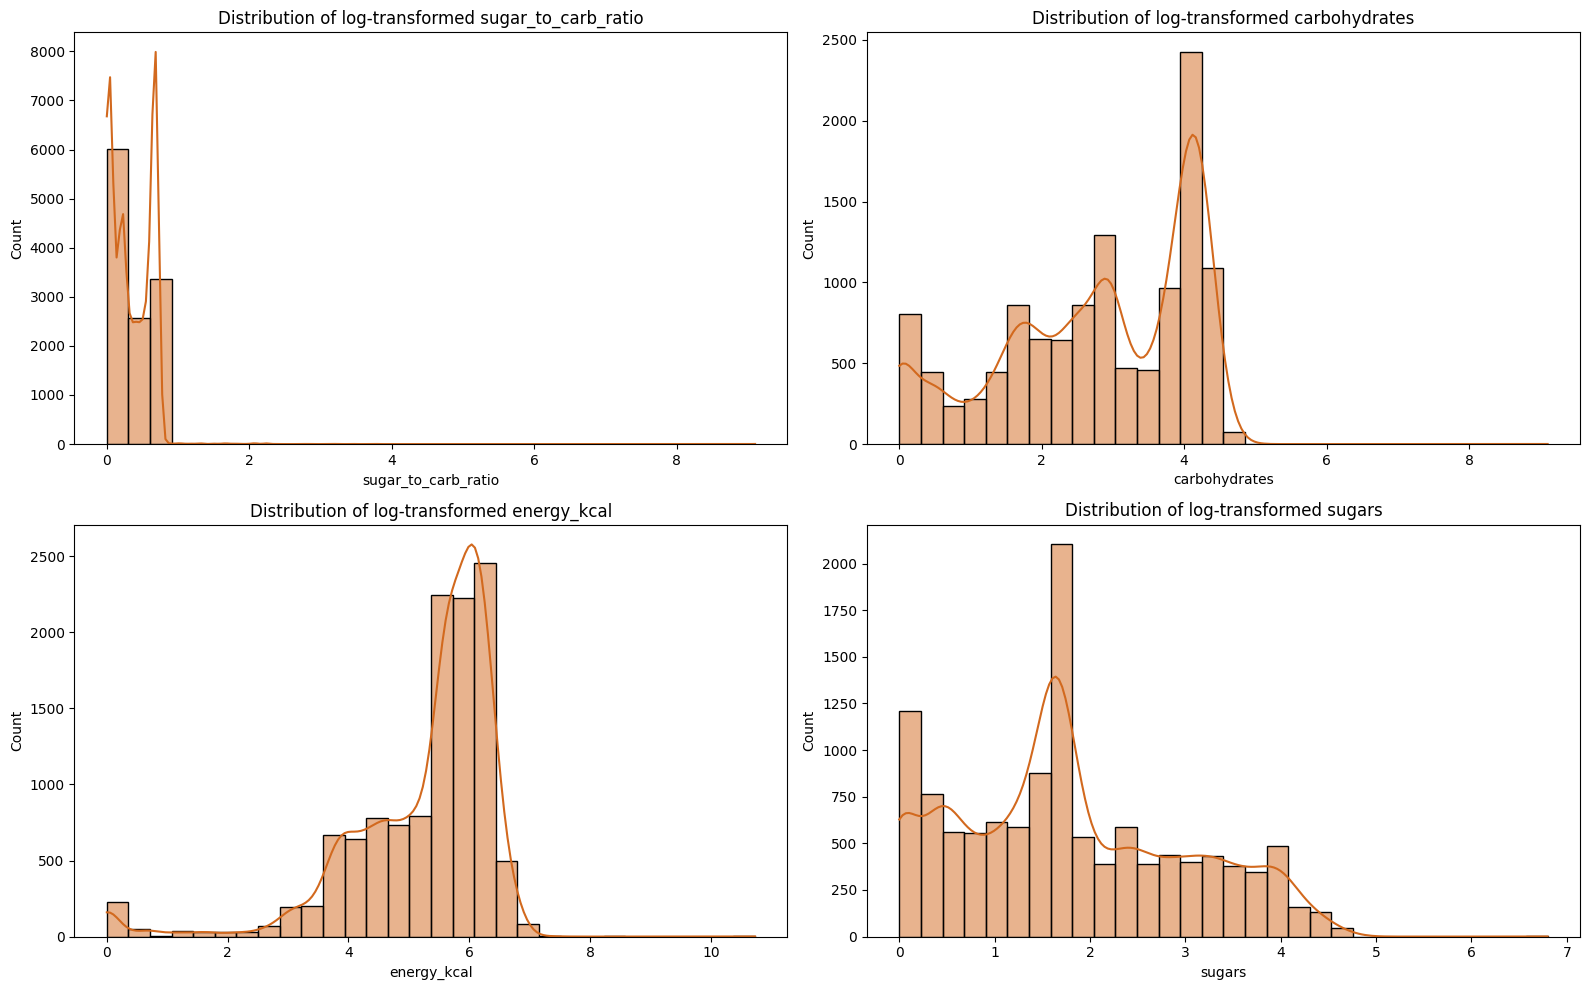

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Columns you want
subset_cols = ['sugar_to_carb_ratio', 'carbohydrates', 'energy_kcal', 'sugars']

plt.figure(figsize=(16, 10))

for i, col in enumerate(subset_cols, 1):
    plt.subplot(2, 2, i)
    
    # Clean data: remove NaN, Inf, and negatives (log can't handle negatives)
    clean_data = df[col].replace([np.inf, -np.inf], np.nan).dropna()
    clean_data = clean_data[clean_data >= 0]
    
    sns.histplot(np.log1p(clean_data), kde=True, bins=30, color="chocolate")
    plt.title(f"Distribution of log-transformed {col}", fontsize=12)

plt.tight_layout()
plt.show()

#### Step 4 — Distribution across categories

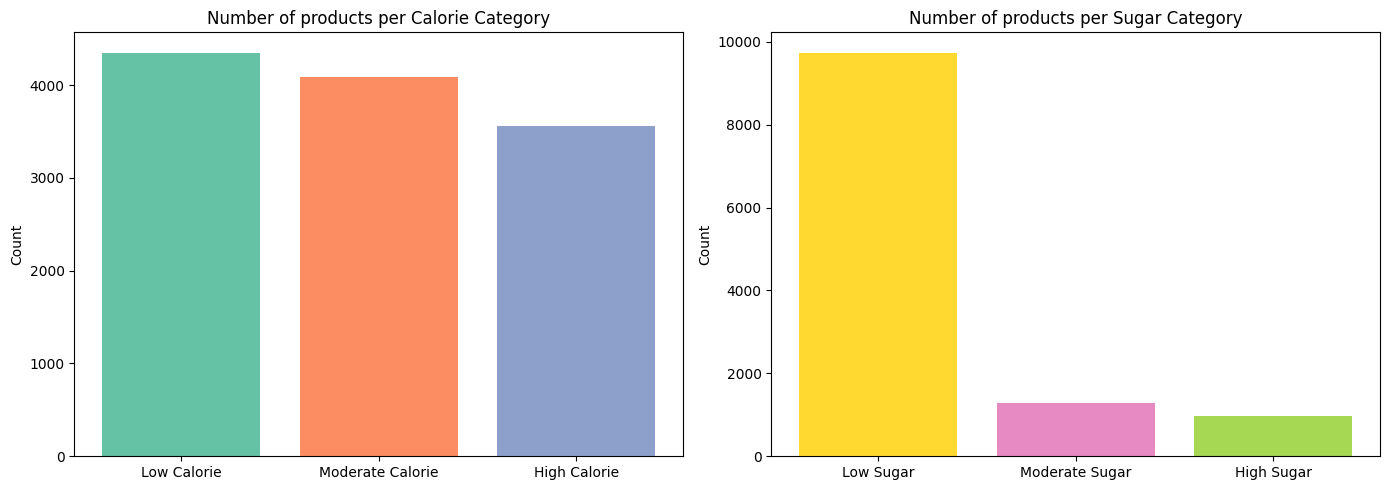

In [32]:
import matplotlib.pyplot as plt

# Define colors manually (similar to Set2 and Set3)
cal_colors = ["#66c2a5", "#fc8d62", "#8da0cb"]  # for calorie_category
sugar_colors = ["#ffd92f", "#e78ac3", "#a6d854"]  # for sugar_category

plt.figure(figsize=(14,5))

# Calorie category
plt.subplot(1,2,1)
cal_counts = df["calorie_category"].value_counts().reindex(["Low Calorie","Moderate Calorie","High Calorie"])
plt.bar(cal_counts.index, cal_counts.values, color=cal_colors)
plt.title("Number of products per Calorie Category")
plt.ylabel("Count")

# Sugar category
plt.subplot(1,2,2)
sugar_counts = df["sugar_category"].value_counts().reindex(["Low Sugar","Moderate Sugar","High Sugar"])
plt.bar(sugar_counts.index, sugar_counts.values, color=sugar_colors)
plt.title("Number of products per Sugar Category")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


#### Step 5 — NOVA group & ultra-processed products

#### Pie chart for NOVA groups


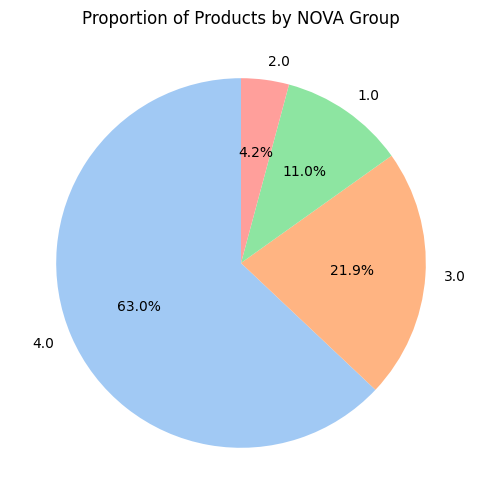

In [33]:
nova_counts = df["nova_group"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(nova_counts, labels=nova_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Proportion of Products by NOVA Group")
plt.show()

#### Bar plot for ultra-processed vs non-ultra-processed


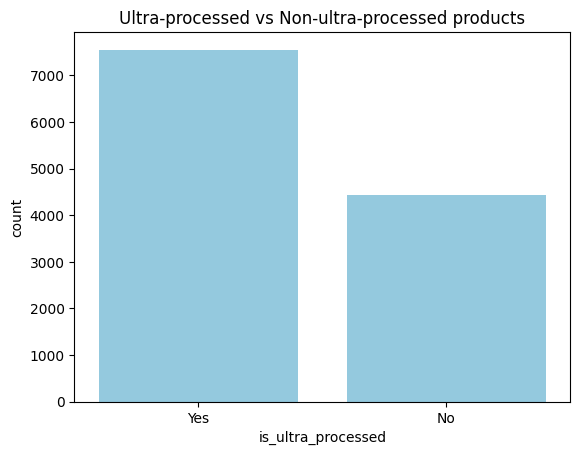

In [34]:
sns.countplot(data=df, x="is_ultra_processed", color="skyblue") 
plt.title("Ultra-processed vs Non-ultra-processed products")
plt.show()

#### Step 6 — Relationship between calories and sugar

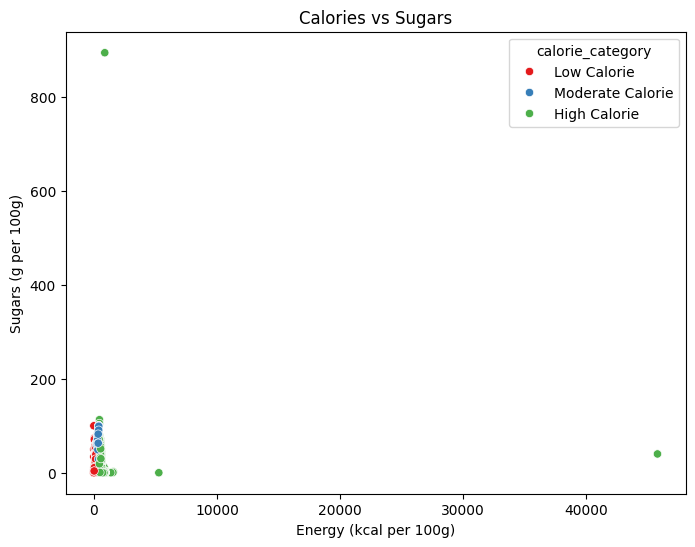

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="energy_kcal", y="sugars", hue="calorie_category", palette="Set1")
plt.title("Calories vs Sugars")
plt.xlabel("Energy (kcal per 100g)")
plt.ylabel("Sugars (g per 100g)")
plt.show()

#### Step 7 — Correlation heatmap

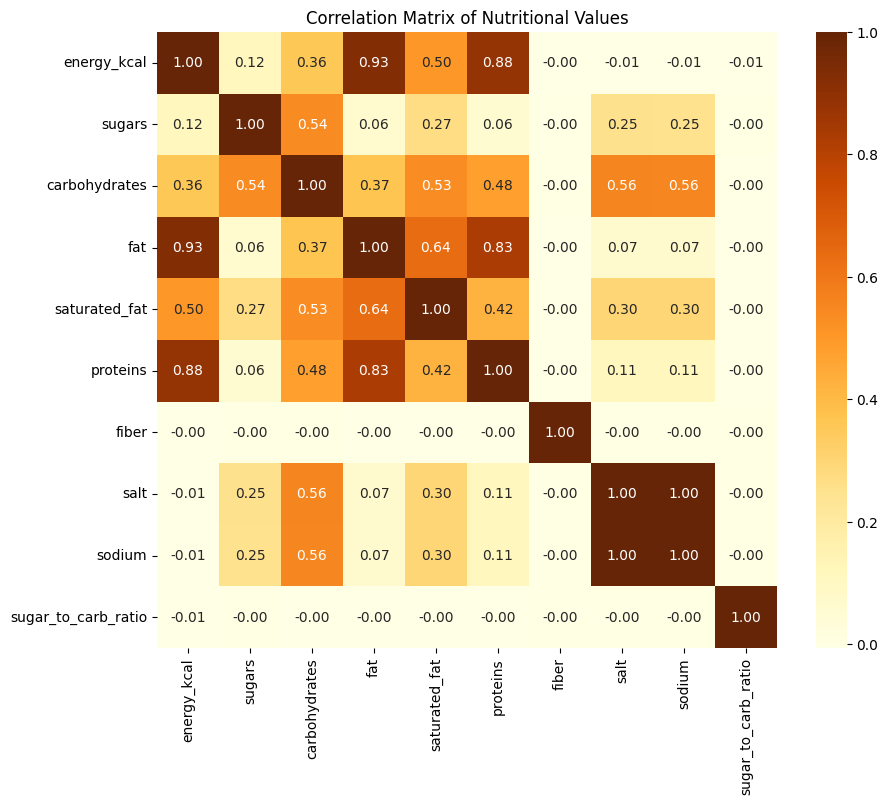

In [36]:
plt.figure(figsize=(10,8))
numeric_df = df[["energy_kcal","sugars","carbohydrates","fat","saturated_fat","proteins","fiber","salt","sodium","sugar_to_carb_ratio"]]
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="YlOrBr")
plt.title("Correlation Matrix of Nutritional Values")
plt.show()

#### Step 8 — Top N brands by average calories or sugars

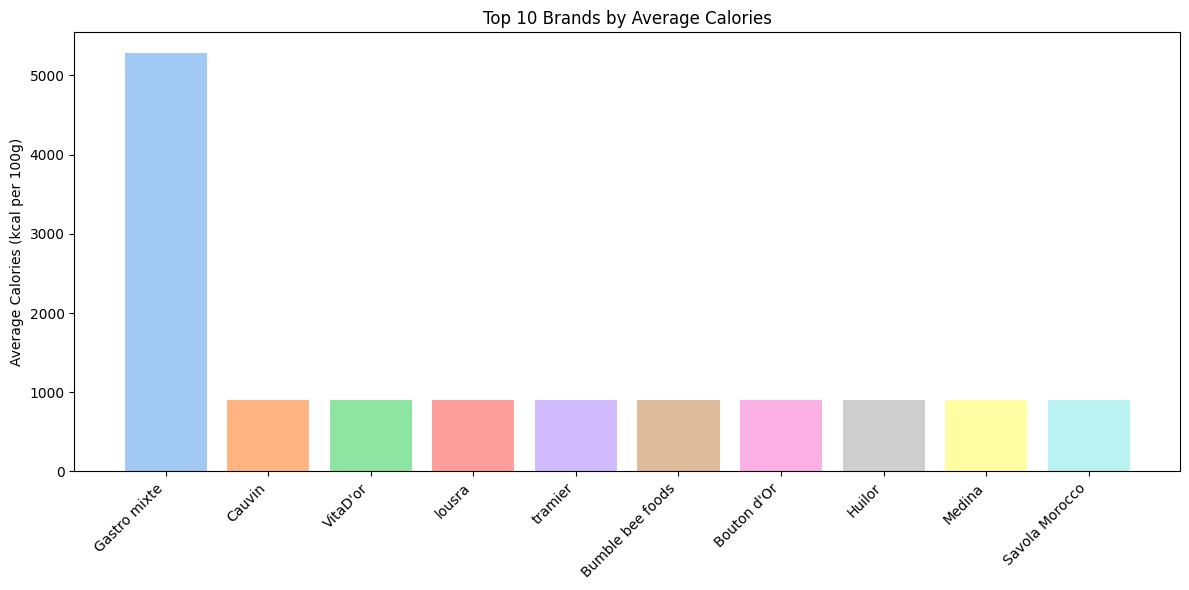

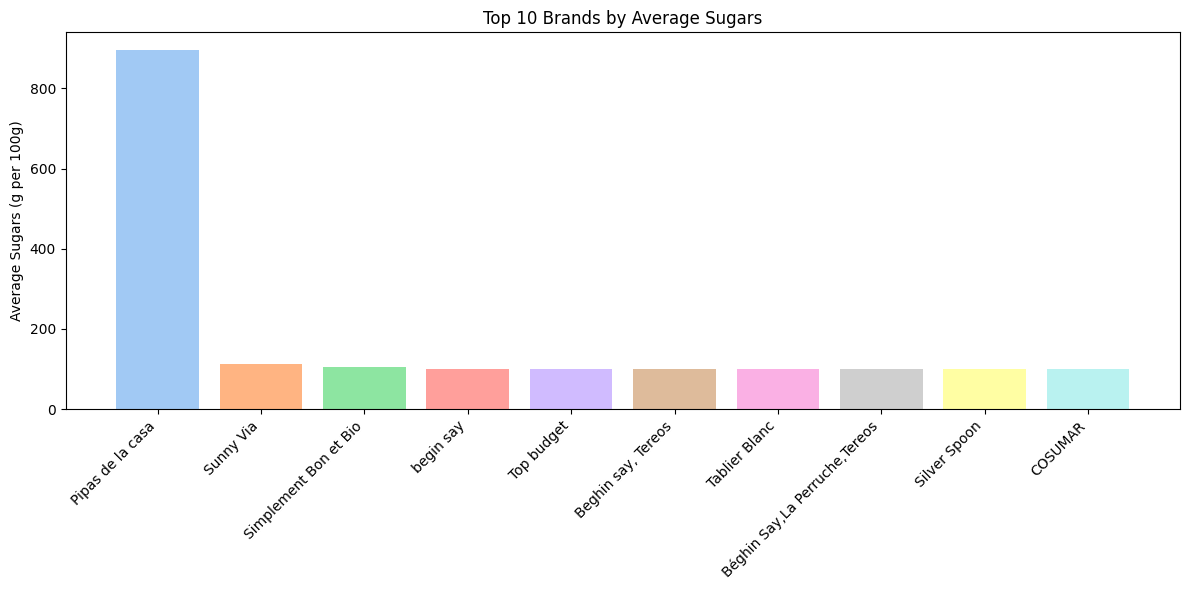

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure brand column has no missing values for this analysis
df_top = df.dropna(subset=["brand"])

# Compute average calories and sugars per brand
brand_stats = df_top.groupby("brand")[["energy_kcal","sugars"]].mean().sort_values("energy_kcal", ascending=False)

# Select top 10 brands by calories
top10_calories = brand_stats.head(10)
top10_sugars = brand_stats.sort_values("sugars", ascending=False).head(10)

# Nice pastel color palette
pastel_colors = sns.color_palette("pastel", 10)  # 10 colors

# ---- Top 10 Brands by Average Calories ----
plt.figure(figsize=(12,6))
plt.bar(top10_calories.index, top10_calories["energy_kcal"], color=pastel_colors)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Calories (kcal per 100g)")
plt.title("Top 10 Brands by Average Calories")
plt.tight_layout()
plt.show()

# ---- Top 10 Brands by Average Sugars ----
plt.figure(figsize=(12,6))
plt.bar(top10_sugars.index, top10_sugars["sugars"], color=pastel_colors)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Sugars (g per 100g)")
plt.title("Top 10 Brands by Average Sugars")
plt.tight_layout()
plt.show()

#### Step 9 — Boxplots for Calories and Sugars across Brands

C:\Users\ayesh\AppData\Local\Temp\ipykernel_13884\4064664982.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="brand", y="energy_kcal", data=df_top_brands, palette="Set3")


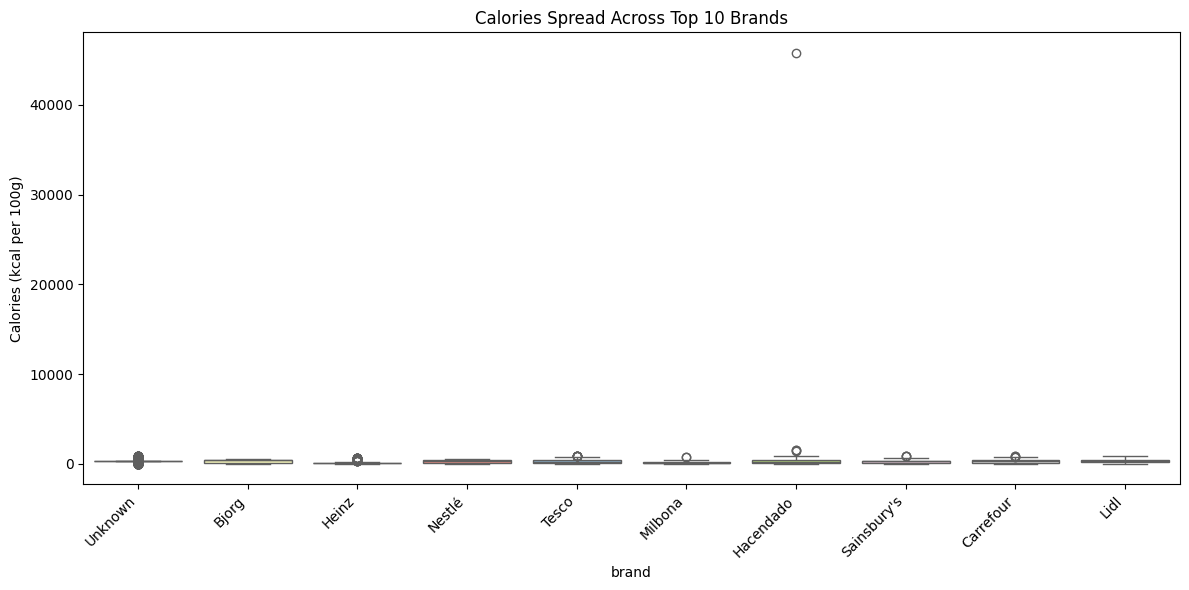

C:\Users\ayesh\AppData\Local\Temp\ipykernel_13884\4064664982.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="brand", y="sugars", data=df_top_brands, palette="Set2")


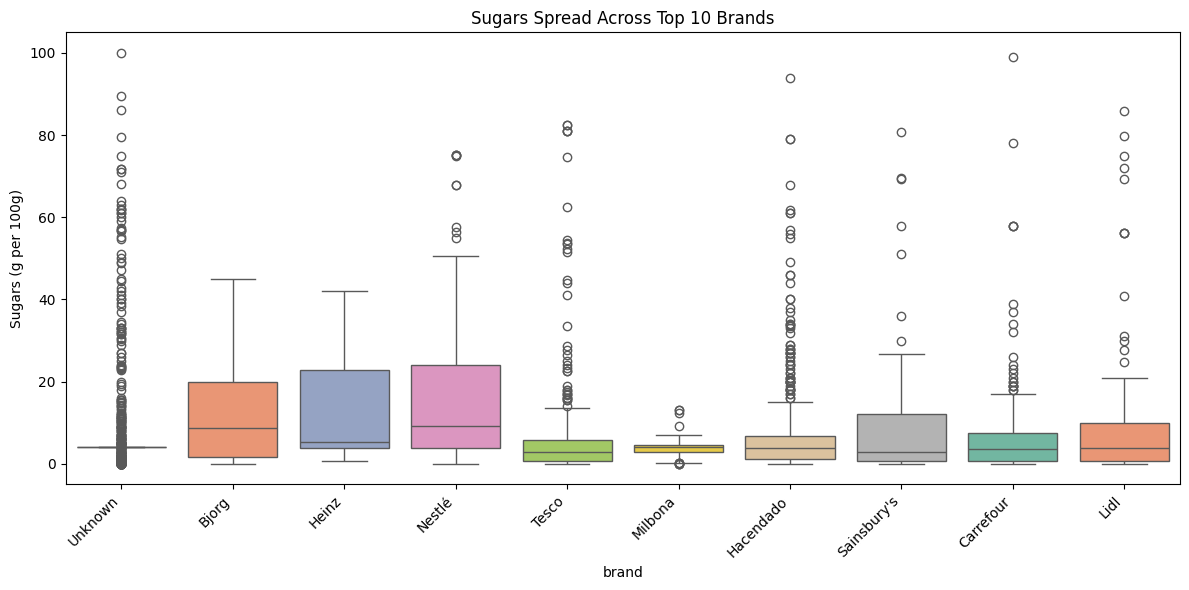

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing brand, energy_kcal, or sugars
df_box = df.dropna(subset=["brand", "energy_kcal", "sugars"])

# Optional: select top N brands by product count to avoid clutter
top_brands_count = df_box["brand"].value_counts().head(10).index
df_top_brands = df_box[df_box["brand"].isin(top_brands_count)]

# ---- Boxplot: Calories ----
plt.figure(figsize=(12,6))
sns.boxplot(x="brand", y="energy_kcal", data=df_top_brands, palette="Set3")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Calories (kcal per 100g)")
plt.title("Calories Spread Across Top 10 Brands")
plt.tight_layout()
plt.show()

# ---- Boxplot: Sugars ----
plt.figure(figsize=(12,6))
sns.boxplot(x="brand", y="sugars", data=df_top_brands, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Sugars (g per 100g)")
plt.title("Sugars Spread Across Top 10 Brands")
plt.tight_layout()
plt.show()


C:\Users\ayesh\AppData\Local\Temp\ipykernel_13884\3509450728.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="brand", y="energy_kcal", data=df_top_brands, palette="Set3")


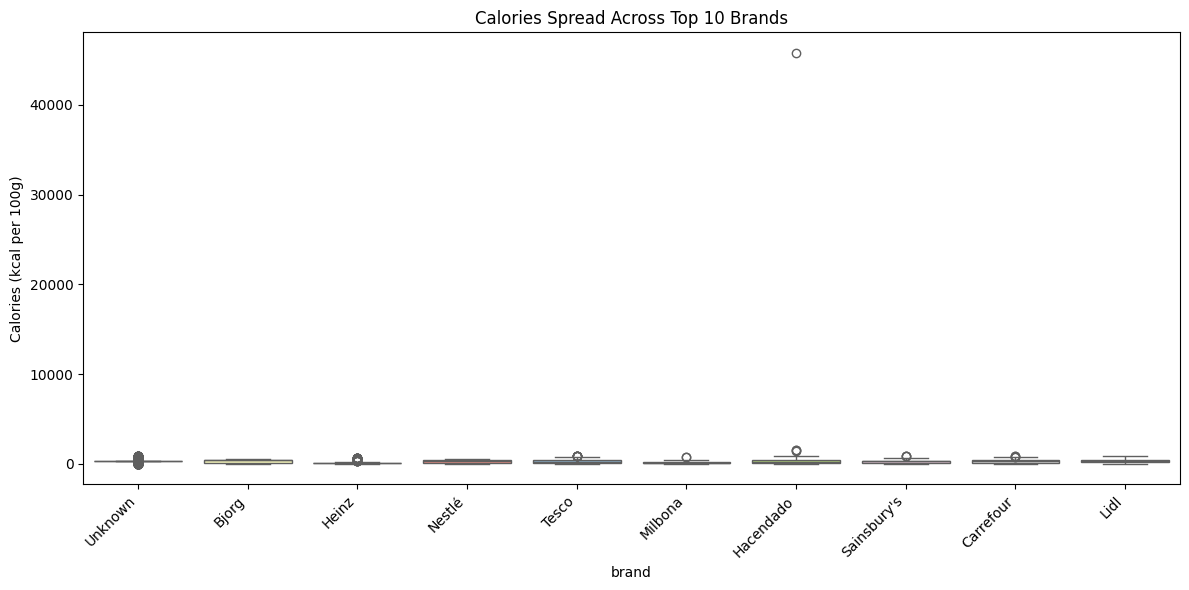

C:\Users\ayesh\AppData\Local\Temp\ipykernel_13884\3509450728.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="brand", y="sugars", data=df_top_brands, palette="Set2")


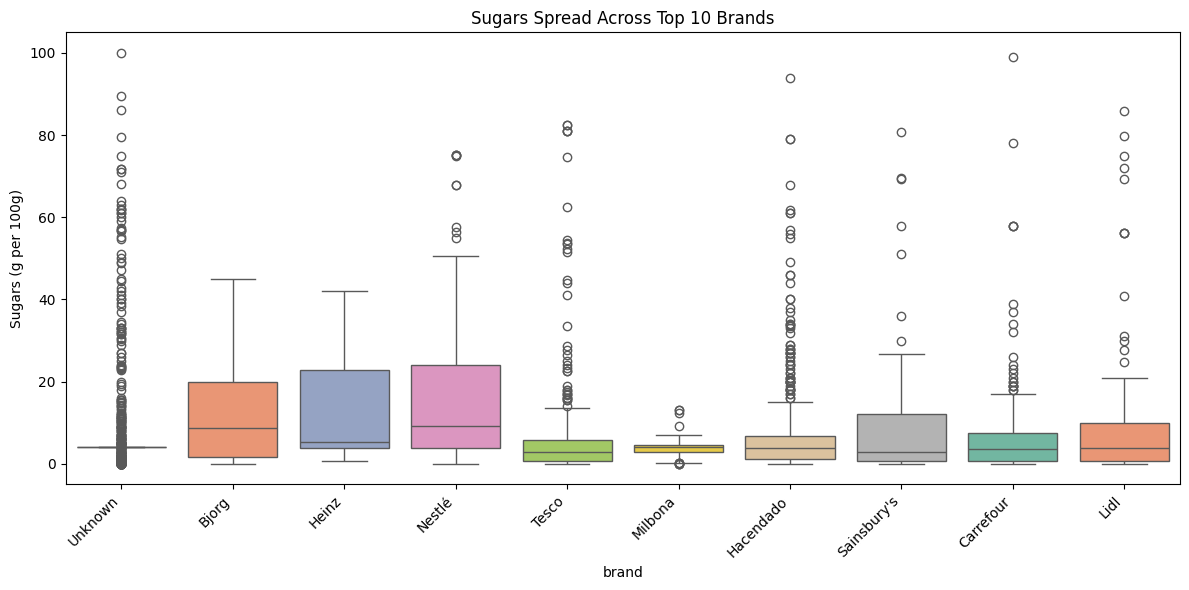

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing brand, energy_kcal, or sugars
df_box = df.dropna(subset=["brand", "energy_kcal", "sugars"])

# Optional: select top N brands by product count to avoid clutter
top_brands_count = df_box["brand"].value_counts().head(10).index
df_top_brands = df_box[df_box["brand"].isin(top_brands_count)]

# ---- Boxplot: Calories ----
plt.figure(figsize=(12,6))
sns.boxplot(x="brand", y="energy_kcal", data=df_top_brands, palette="Set3")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Calories (kcal per 100g)")
plt.title("Calories Spread Across Top 10 Brands")
plt.tight_layout()
plt.show()

# ---- Boxplot: Sugars ----
plt.figure(figsize=(12,6))
sns.boxplot(x="brand", y="sugars", data=df_top_brands, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Sugars (g per 100g)")
plt.title("Sugars Spread Across Top 10 Brands")
plt.tight_layout()
plt.show()

#### Stacked Bar - Ultra-Processed vs Minimally Processed per Calorie Category

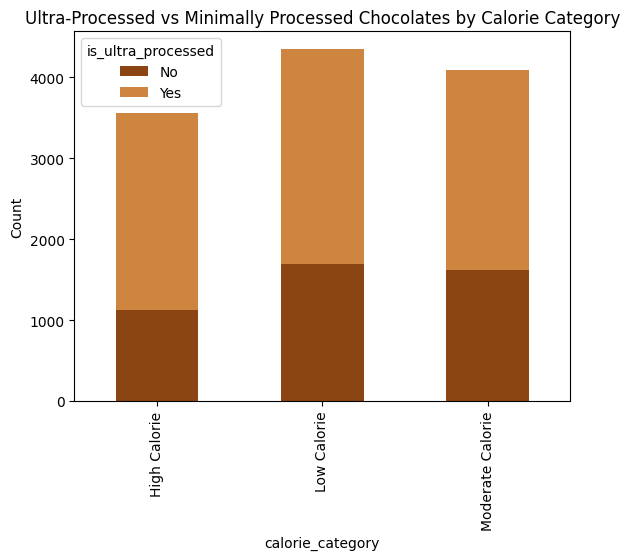

In [40]:
pd.crosstab(df['calorie_category'], df['is_ultra_processed']).plot(kind='bar', stacked=True, color=["#8B4513","#CD853F"])
plt.title("Ultra-Processed vs Minimally Processed Chocolates by Calorie Category")
plt.ylabel("Count")
plt.show()

#### Top 10 Brands by Average Sugar
Shows: Which brands are the fattiest — good for comparing healthiness.

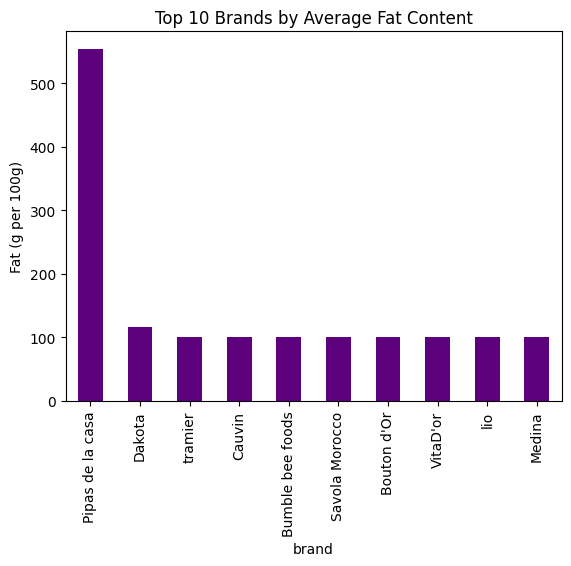

In [41]:
top10_fat = df.groupby("brand")["fat"].mean().sort_values(ascending=False).head(10)
top10_fat.plot(kind="bar", color="#5D017C")
plt.title("Top 10 Brands by Average Fat Content")
plt.ylabel("Fat (g per 100g)")
plt.show()

#### Doughnut chart: Calorie Categories
shows:

The relative proportion of low, moderate, and high-calorie chocolates.

The hole in the middle makes it a doughnut instead of a regular pie chart.

Easy to see which category dominates visually.

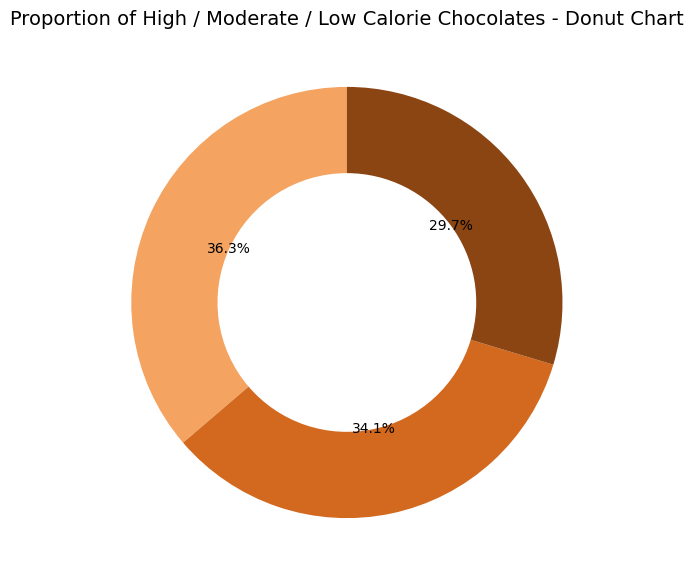

In [42]:
import matplotlib.pyplot as plt

# Count of each category
counts = df['calorie_category'].value_counts()
labels = None
sizes = counts.values

# Colors
colors = ["#F4A460","#D2691E","#8B4513"]

# Create pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title("Proportion of High / Moderate / Low Calorie Chocolates - Donut Chart", fontsize=14)
plt.show()


| Category | % of Products |
| -------- | ------------- |
| Low Calorie | 29.7% |
| Moderate Calorie | 34.1% |
| High Calorie | 36.3% |

### Pie Chart of Calorie Categories
Shows: How many chocolates are low, moderate, or high in calories — easy overview of healthiness.

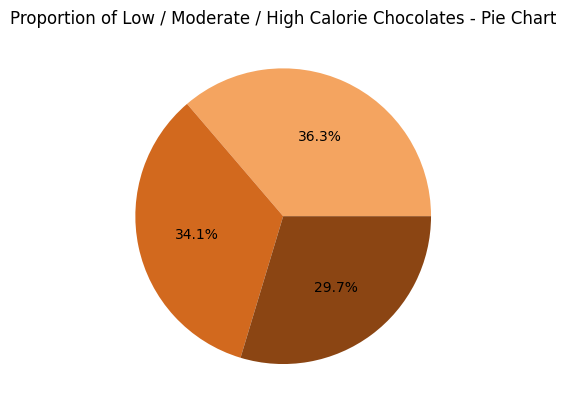

In [43]:
import matplotlib.pyplot as plt

df['calorie_category'].value_counts().plot(
    kind='pie',
    labels=['']*df['calorie_category'].nunique(),  # remove labels
    autopct='%1.1f%%',
    colors=["#F4A460","#D2691E","#8B4513"]  # light → dark (you can match in markdown)
)

plt.title("Proportion of Low / Moderate / High Calorie Chocolates - Pie Chart") 
plt.ylabel("") 
plt.show()


| Category | % of Products |
| -------- | ------------- |
| Low Calorie | 29.7% |
| Moderate Calorie | 34.1% |
| High Calorie | 36.3% |

### Horizontal Bar Plot — Average Fiber by Calorie Category
Shows:

Fiber levels across low, moderate, high calorie chocolates.

Helps identify which calorie category is more fibrous / less fibrous.

Horizontal bars are often easier to read for categories.

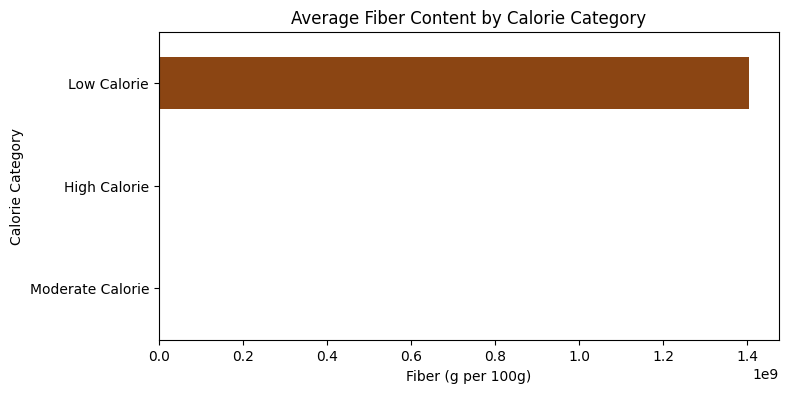

In [45]:
avg_fiber = df.groupby("calorie_category")["fiber"].mean().sort_values()
avg_fiber.plot(kind="barh", color="#8B4513", figsize=(8,4))
plt.title("Average Fiber Content by Calorie Category")
plt.xlabel("Fiber (g per 100g)")
plt.ylabel("Calorie Category")
plt.show()


#### Stacked Area Chart — Cumulative Sugar Across Top Brands
Shows:

Which brands have more sugary products cumulatively.

Area shows “sugar contribution” visually per brand.

Easy to compare top brands at a glance.

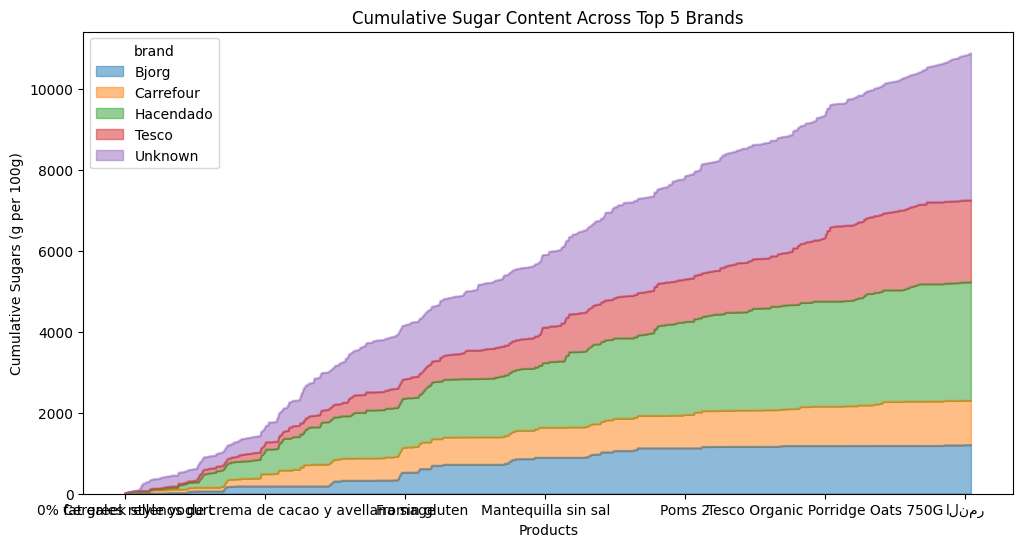

In [44]:
# Top 5 brands by product count
top_brands = df['brand'].value_counts().head(5).index
df_top = df[df['brand'].isin(top_brands)]

# Pivot for cumulative sum
pivot = df_top.pivot_table(index="product_name", columns="brand", values="sugars", fill_value=0).cumsum()

# Plot
pivot.plot(kind="area", figsize=(12,6), alpha=0.5)
plt.title("Cumulative Sugar Content Across Top 5 Brands")
plt.ylabel("Cumulative Sugars (g per 100g)")
plt.xlabel("Products")
plt.show()